<a href="https://colab.research.google.com/github/kaustav1996/utility_data_analysis/blob/master/analyze_csv_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import dependencies

import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans  
%matplotlib inline


Load data from git repository :

In [2]:
repo_url = 'https://github.com/kaustav1996/utility_data_analysis'

%cd /content

repo_dir_path = os.path.abspath(os.path.join('.', os.path.basename(repo_url)))

!git clone {repo_url}
%cd {repo_dir_path}
!git pull

%ls

csv_file= os.path.abspath(os.path.join(repo_dir_path,'interval_data.csv'))


/content
fatal: destination path 'utility_data_analysis' already exists and is not an empty directory.
/content/utility_data_analysis
Already up to date.
analyze_csv_data.ipynb  interval_data.csv  LICENSE  README.md


Load data from CSV.

In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y %H:%M')
data = pd.read_csv(csv_file, parse_dates=['TIME'], index_col='TIME',date_parser=dateparse)
print ( data.head())
data.index

                       KW
TIME                     
2018-08-29 00:15:00  0.64
2018-08-29 00:30:00  0.74
2018-08-29 00:45:00  1.10
2018-08-29 01:00:00  0.92
2018-08-29 01:15:00  0.92


DatetimeIndex(['2018-08-29 00:15:00', '2018-08-29 00:30:00',
               '2018-08-29 00:45:00', '2018-08-29 01:00:00',
               '2018-08-29 01:15:00', '2018-08-29 01:30:00',
               '2018-08-29 01:45:00', '2018-08-29 02:00:00',
               '2018-08-29 02:15:00', '2018-08-29 02:30:00',
               ...
               '2019-05-29 19:45:00', '2019-05-29 20:00:00',
               '2019-05-29 20:15:00', '2019-05-29 20:30:00',
               '2019-05-29 20:45:00', '2019-05-29 21:00:00',
               '2019-05-29 21:15:00', '2019-05-29 21:30:00',
               '2019-05-29 21:45:00', '2019-05-29 22:00:00'],
              dtype='datetime64[ns]', name='TIME', length=16400, freq=None)

[]


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


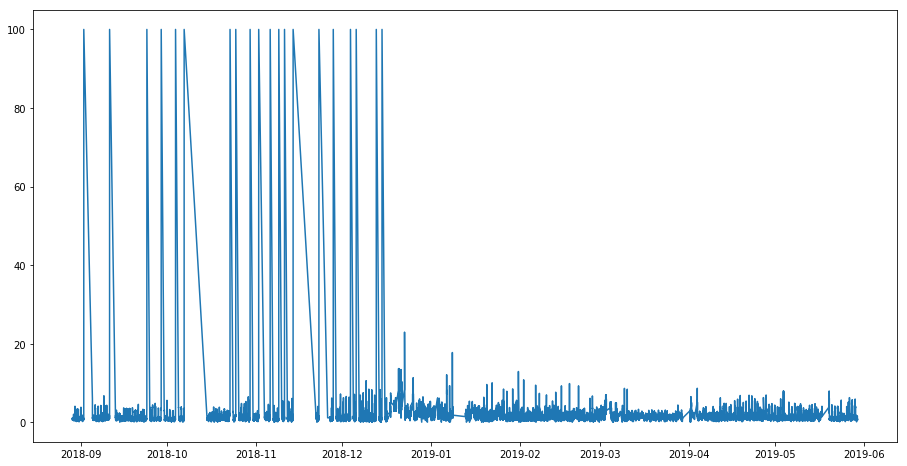

In [4]:
ts = data['KW'] 
x=ts.sort_index()

print([])

fig= plt.figure(figsize=(6,3))

axes= fig.add_axes([0.5,0.5,2,2])


axes.plot(x)

plt.show()

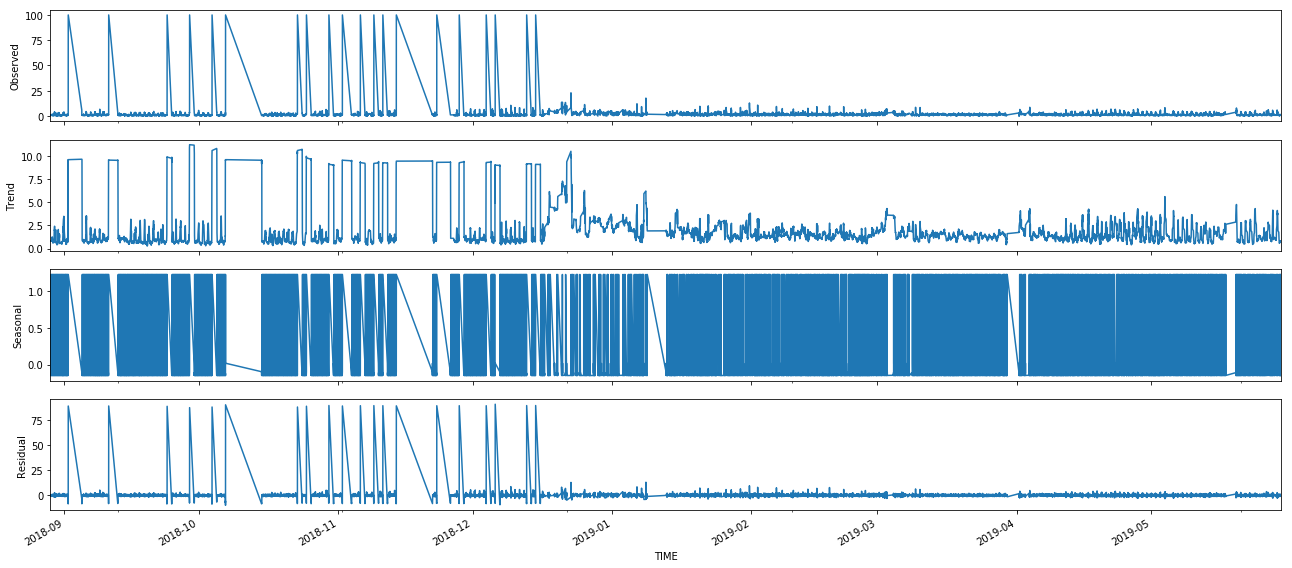

In [5]:
# ! pip install --upgrade Cython
# ! pip install --upgrade git+https://github.com/statsmodels/statsmodels
import statsmodels.api as sm

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(ts, model='additive', freq = 12)
fig = decomposition.plot()
plt.show()


In [6]:
import itertools
# warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [0]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results=mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:91478.12442310982


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:91099.01430097471


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:99993.85211757656


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:88499.50823754119


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:91023.26075101057


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:88560.9371305205


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:95325.57812333685


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [7]:
mod = sm.tsa.statespace.SARIMAX(ts,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0600      0.007      8.244      0.000       0.046       0.074
ma.L1         -1.0000      0.076    -13.079      0.000      -1.150      -0.850
ar.S.L12      -0.4961      0.001   -725.912      0.000      -0.497      -0.495
sigma2        19.6771      1.516     12.984      0.000      16.707      22.647


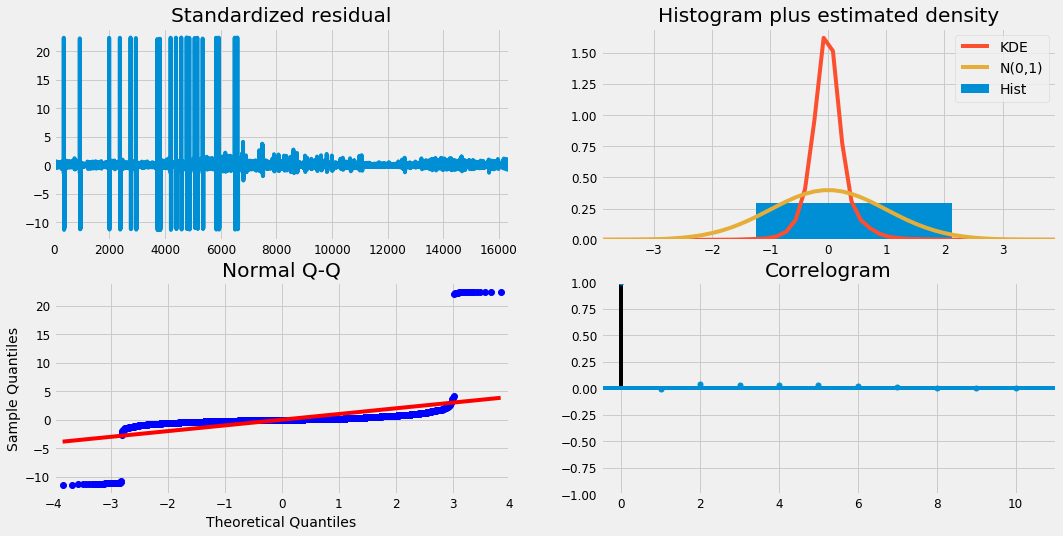

In [8]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [9]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('TIME')
ax.set_ylabel('KW')
plt.legend()
plt.show()

KeyError: ignored